In [284]:
import time
import io
import hiive.mdptoolbox
import matplotlib.pyplot as plt
from hiive.mdptoolbox import mdp, example
from gym.envs.toy_text.frozen_lake import generate_random_map

random_map_s = generate_random_map(size=4, p=0.8)

random_map_s = ['SFFF','FFFH','HFFF','HFFG']

P_FL_q, R_FL_q = hiive.mdptoolbox.example.openai('FrozenLake-v1', desc=random_map_s, map_name="4x4", is_slippery=True)

In [290]:
time1 = time.perf_counter()

alpha = 0.9
gamma = 0.999
alpha_decay=0.99
alpha_min=0.01
epsilon=1.0
epsilon_min=0.2
epsilon_decay=0.9
n_iter = 3000000

QL_s = mdp.QLearning(P_FL_q, R_FL_q, alpha=alpha, gamma= gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter)
QL_s.run()

time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

time for running the algorithm = 148.10438905699993 s


random map :
['SFFF', 'FFFH', 'HFFF', 'HFFG']
Value function :
[[0.13081632 0.15174014 0.16228022 0.09518023]
 [0.06965618 0.1783035  0.16591574 0.        ]
 [0.         0.22323058 0.37458077 0.45105965]
 [0.         0.28208132 0.54710512 0.        ]]
policy :
[[3 1 0 3]
 [1 2 1 0]
 [0 1 2 0]
 [0 3 3 0]]


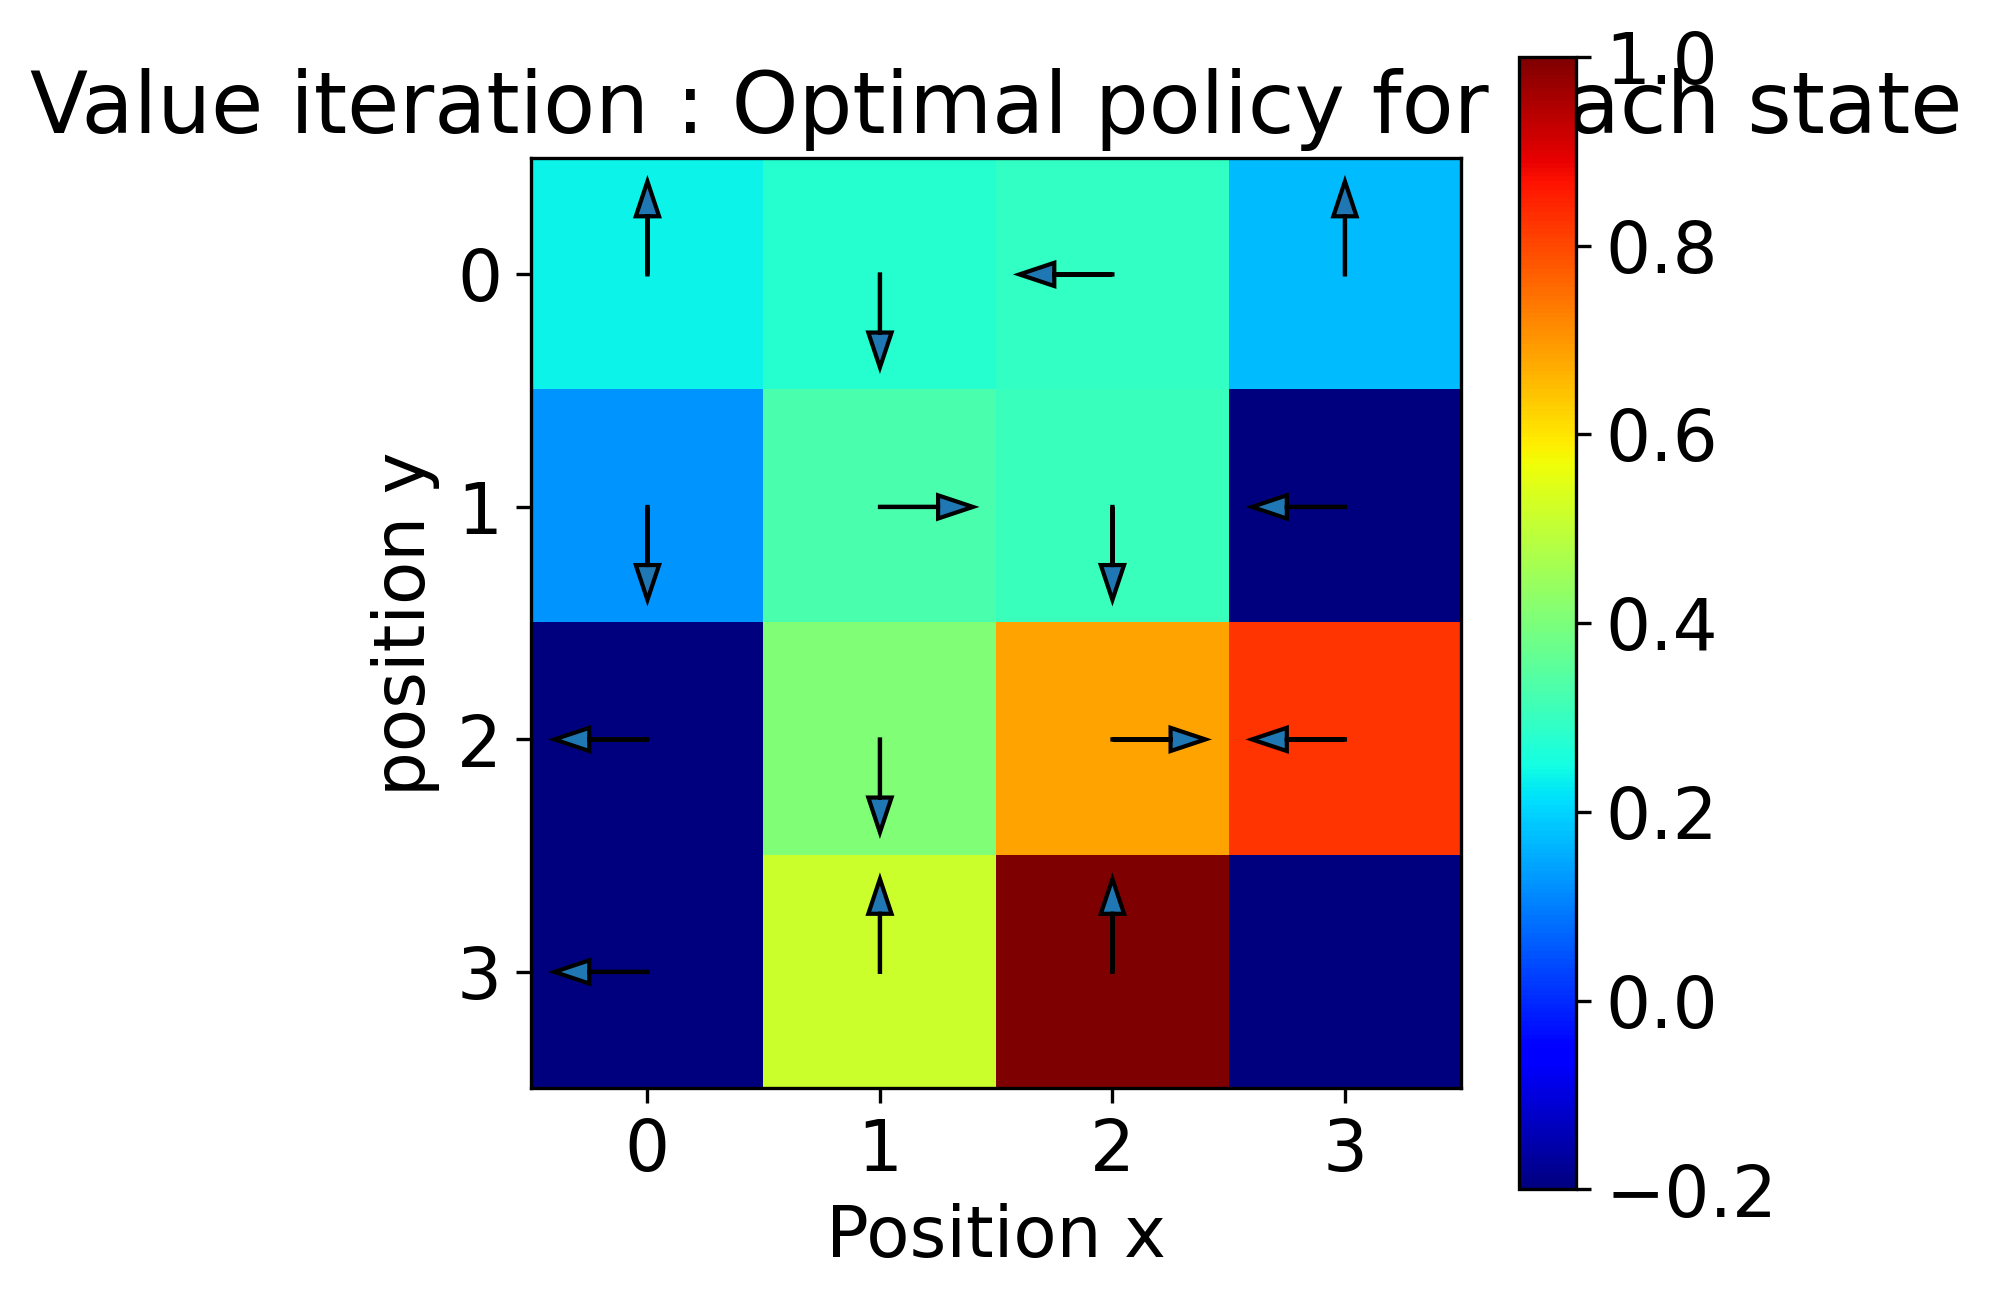

In [286]:
list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))


value_s = list(QL_s.V)
list_Z = []
for i in range(len(value_s)):
    list_Z.append(value_s[i]/max(value_s))
    if list_Z[i]==0:
        list_Z[i]= -0.2
list_Z_norm = np.reshape(list_Z,(size,size))

print('random map :')
print(random_map_s)
print('Value function :')
print(np.reshape(QL_s.V,(size,size)))

arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

ar_s =  np.reshape(QL_s.policy,(size,size))
print('policy :')
print(ar_s)

fig, ax = plt.subplots()
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

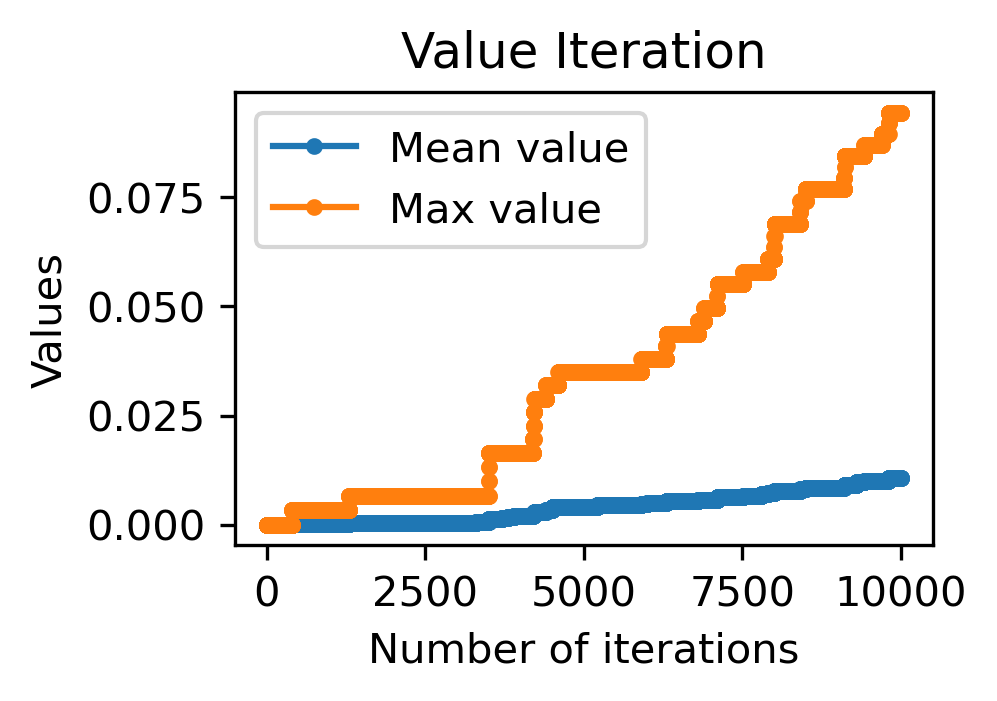

In [299]:
list_meanV_QL = []
list_maxV_QL = []
list_iteration_QL = []
for i in range(len(QL.run_stats)):
    list_meanV_QL.append(QL.run_stats[i].get('Mean V'))
    list_maxV_QL.append(QL.run_stats[i].get('Max V'))
    list_iteration_QL.append(QL.run_stats[i].get('Iteration'))

fig, ax = plt.subplots(figsize=(3,2))
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_QL, list_meanV_QL, marker ='.', label="Mean value")
ax.plot(list_iteration_QL, list_maxV_QL, marker=".", label="Max value")
ax.legend()
plt.rcParams.update({'font.size': 10})
plt.show()

In [ ]:
random_map_l = ['SFHHFFFFFFFFHFFHFFFH', 'FFFFFFFHFFHFFFHFFFFF', 'FFFFFFFHFFFHFHHFFFFF', 'FFFFFFFFHFFFFFFFFHFH', 'FFHFFFFHFHFFFFFHFHFF', 'HHFFFFFFHFHFFFFFFFFF', 'HFFFFHHFFFFFFFFHFHFF', 'FFFHFHFFFFHFFHFHFFFF', 'FFHFHFFFFFFHFFFFFHHF', 'FFFFFFFFHFFFFFFFFFFF', 'FFFFFFHHHFFFFFHFFHFH', 'FFFHFFHHFFFFFHFFHFHF', 'FFFFHFFFFFFFFFHFFFFH', 'FFFFFFFHFFHFHFFFFFFF', 'FFFFFFHFFHFHFFFFFFHF', 'HFFFFFFFHFFFFFHFFHFF', 'FFFFFHHFFFFFFHFFFHFF', 'FFFHHFFFFFHFFFFFFHHF', 'FFFFFFHFFHFFFFFFFFFF', 'FFFFHFFFHFHFFHFFFFFG']

P_FL_q_l, R_FL_q_l = hiive.mdptoolbox.example.openai('FrozenLake-v1', desc=random_map_l, map_name="4x4", is_slippery=True)

In [300]:
time1 = time.perf_counter()

alpha = 0.5
gamma = 0.999
alpha_decay=0.99
alpha_min=0.01
epsilon=1.0
epsilon_min=0.2
epsilon_decay=0.9
n_iter = 3000000

QL_l = mdp.QLearning(P_FL_q_l, R_FL_q_l, alpha=alpha, gamma= gamma, alpha_decay=alpha_decay, alpha_min=alpha_min,
                 epsilon=epsilon, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, n_iter = n_iter)
QL_l.run()

time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')

time for running the algorithm = 514.1704325169849 s


random map :
['SFHHFFFFFFFFHFFHFFFH', 'FFFFFFFHFFHFFFHFFFFF', 'FFFFFFFHFFFHFHHFFFFF', 'FFFFFFFFHFFFFFFFFHFH', 'FFHFFFFHFHFFFFFHFHFF', 'HHFFFFFFHFHFFFFFFFFF', 'HFFFFHHFFFFFFFFHFHFF', 'FFFHFHFFFFHFFHFHFFFF', 'FFHFHFFFFFFHFFFFFHHF', 'FFFFFFFFHFFFFFFFFFFF', 'FFFFFFHHHFFFFFHFFHFH', 'FFFHFFHHFFFFFHFFHFHF', 'FFFFHFFFFFFFFFHFFFFH', 'FFFFFFFHFFHFHFFFFFFF', 'FFFFFFHFFHFHFFFFFFHF', 'HFFFFFFFHFFFFFHFFHFF', 'FFFFFHHFFFFFFHFFFHFF', 'FFFHHFFFFFHFFFFFFHHF', 'FFFFFFHFFHFFFFFFFFFF', 'FFFFHFFFHFHFFHFFFFFG']
Value function :
[[1.54609877e-32 3.49848699e-32 0.00000000e+00 0.00000000e+00
  5.25002138e-29 8.23072315e-27 3.71085356e-27 2.15952604e-26
  3.41172488e-25 2.18670459e-24 4.87762808e-26 4.74941302e-24
  0.00000000e+00 3.90488110e-23 1.63222393e-24 0.00000000e+00
  5.93655243e-22 2.72516920e-22 1.49250177e-23 0.00000000e+00]
 [2.43813093e-31 3.81005850e-30 2.87259771e-29 5.15694438e-28
  7.61782648e-27 1.25281420e-25 9.56017480e-26 0.00000000e+00
  1.21748364e-24 2.25800287e-23 0.00000000e+00 1.33894

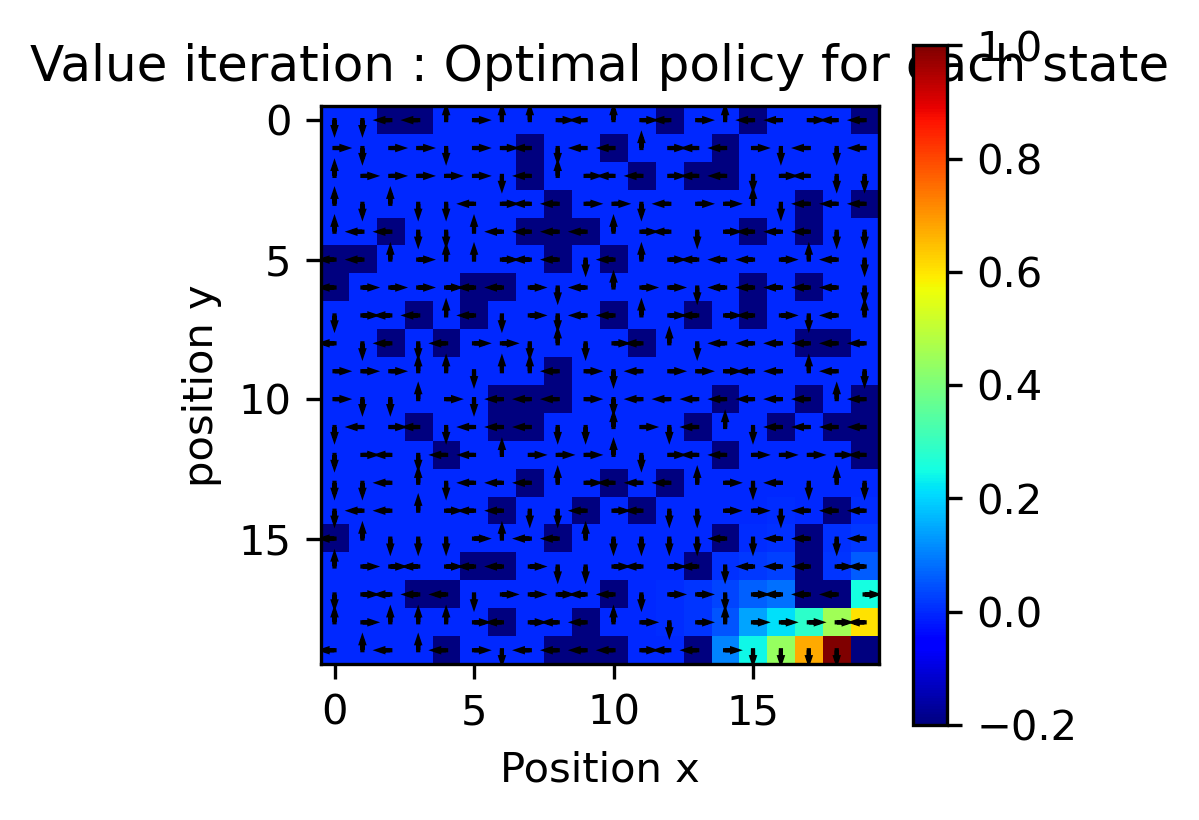

In [293]:
list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
size = 20
value_l = list(QL_l.V)
list_Z_l = []
for i in range(len(value_l)):
    list_Z_l.append(value_l[i]/max(value_l))
    if list_Z_l[i]==0:
        list_Z_l[i]= -0.2
list_Z_l_norm = np.reshape(list_Z_l,(size,size))

print('random map :')
print(random_map_l)
print('Value function :')
print(np.reshape(QL_l.V,(size,size)))

arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

ar_s =  np.reshape(QL_l.policy,(size,size))
print('policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(3, 3))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_l_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

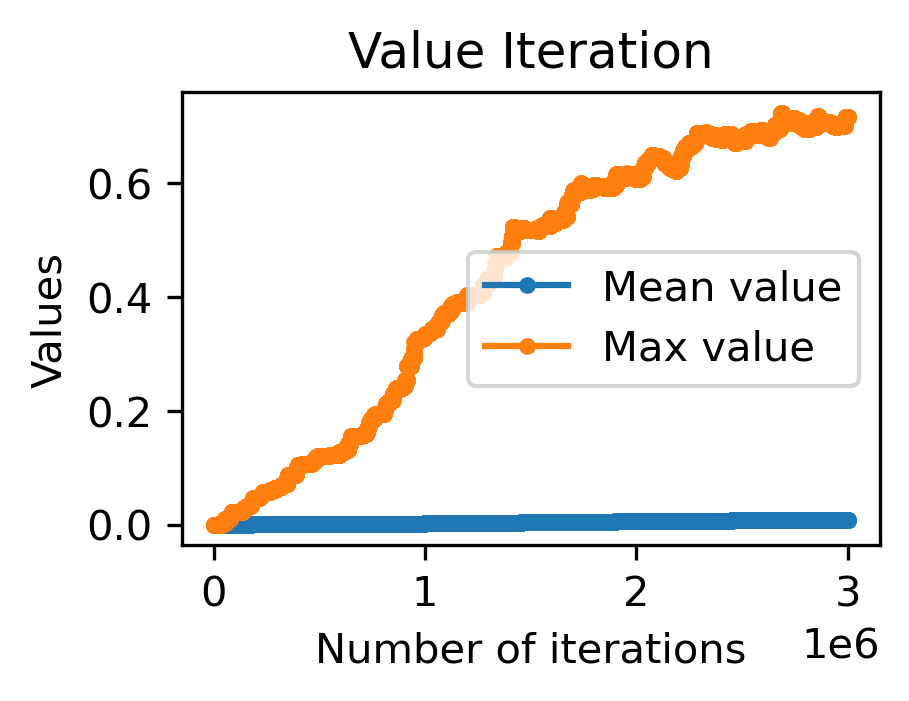

In [297]:
list_meanV_QL_l = []
list_maxV_QL_l = []
list_iteration_QL_l = []
for i in range(len(QL_l.run_stats)):
    list_meanV_QL_l.append(QL_l.run_stats[i].get('Mean V'))
    list_maxV_QL_l.append(QL_l.run_stats[i].get('Max V'))
    list_iteration_QL_l.append(QL_l.run_stats[i].get('Iteration'))

fig, ax = plt.subplots(figsize =(3,2))
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_QL_l, list_meanV_QL_l, marker ='.', label="Mean value")
ax.plot(list_iteration_QL_l, list_maxV_QL_l, marker=".", label="Max value")
ax.legend()
plt.show()